Steps :

1. Handle missing values
2. Drop the unnecessary columns
3. Convert the categorical string columns to numerical columns, by using one-hot encoding
4. Perform feature scaling (if necessary).
5. Build a model on the “total” column, using a RandomForestRegressor
6. Calculate the score
7. Predict on a new set of features

In [1]:
import pandas as pd
df=pd.read_csv("C:/Datasets/ipl2017.csv")

In [2]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [50]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [3]:
y=df["total"]

In [4]:
x=df.drop("total",axis =1)

In [5]:
x=x.drop(["date","mid"],axis=1)

In [6]:
# Dropped the unnecessary columns

In [7]:
x.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0


In [8]:
x.isna().sum()

venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
dtype: int64

In [9]:
y.isna().sum()

0

In [10]:
# Has No Missing values. 

In [11]:
x.dtypes

venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
dtype: object

In [12]:
# Not all values are numeric, hence we convert
import numpy as np

In [13]:
x=pd.get_dummies(x,columns=x.columns)

In [14]:
x.dtypes

venue_Barabati Stadium              uint8
venue_Brabourne Stadium             uint8
venue_Buffalo Park                  uint8
venue_De Beers Diamond Oval         uint8
venue_Dr DY Patil Sports Academy    uint8
                                    ...  
non-striker_93                      uint8
non-striker_95                      uint8
non-striker_97                      uint8
non-striker_103                     uint8
non-striker_109                     uint8
Length: 1559, dtype: object

In [15]:
type(x)

pandas.core.frame.DataFrame

In [16]:
# Converted the categorical string columns to numerical columns by using one-hot encoding

In [17]:
x.shape

(76014, 1559)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [20]:
x.describe()

,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Green Park,...,non-striker_79,non-striker_80,non-striker_81,non-striker_82,non-striker_87,non-striker_93,non-striker_95,non-striker_97,non-striker_103,non-striker_109
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,...,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,0.011261,0.018155,0.004999,0.004841,0.027469,0.014642,0.011419,0.092733,0.092983,0.006472,...,0.000053,0.000026,0.000039,0.000053,0.000013,0.000013,0.000026,0.000013,0.000013,0.000026
std,0.105520,0.133511,0.070528,0.069411,0.163446,0.120116,0.106248,0.290060,0.290410,0.080192,...,0.007254,0.005129,0.006282,0.007254,0.003627,0.003627,0.005129,0.003627,0.003627,0.005129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()

In [23]:
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [24]:
# Perform feature scaling (mostly not necessary)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model= RandomForestRegressor()
# or model= RandomForestClassifier(n_estimators=150)
# or model= RandomForestClassifier(n_estimators=150, oob_score=True)

In [27]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
model.score(x_test,y_test)

0.8744821603665542

In [29]:
# Built a model on the “total” column using a RandomForestRegressor

In [32]:
#prediction
data= pd.DataFrame({0:[4,27],1:["2018-04-18","2020-04-18"],2:["M Chinnaswamy Stadium","Buffalo Park"],3:["Royal Challengers Bangalore","Kolkata Knight Riders"],4:["Chennai Super Kings","Kings XI Punjab"],5:["P Negi","SC Ganguly"],6:["JDP Oram","B Lee"],7:[2,1],8:[0,0],9:[0.4,8.6],10:[6,50],11:[2,3],12:[18,29],13:[4,5]})

In [33]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4,2018-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,P Negi,JDP Oram,2,0,0.4,6,2,18,4
1,27,2020-04-18,Buffalo Park,Kolkata Knight Riders,Kings XI Punjab,SC Ganguly,B Lee,1,0,8.6,50,3,29,5


In [35]:
data=data.drop([0,1],axis=1)

In [36]:
data

,2,3,4,5,6,7,8,9,10,11,12,13
0,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,P Negi,JDP Oram,2,0,0.4,6,2,18,4
1,Buffalo Park,Kolkata Knight Riders,Kings XI Punjab,SC Ganguly,B Lee,1,0,8.6,50,3,29,5


In [38]:
data=pd.get_dummies(data,columns=data.columns)

In [39]:
data

,2_Buffalo Park,2_M Chinnaswamy Stadium,3_Kolkata Knight Riders,3_Royal Challengers Bangalore,4_Chennai Super Kings,4_Kings XI Punjab,5_P Negi,5_SC Ganguly,6_B Lee,6_JDP Oram,...,9_0.4,9_8.6,10_6,10_50,11_2,11_3,12_18,12_29,13_4,13_5
0,0,1,0,1,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,1,0,1,0,0,1,0,1,1,0,...,0,1,0,1,0,1,0,1,0,1


In [41]:
# model.predict(data)
x.columns

Index(['venue_Barabati Stadium_0', 'venue_Barabati Stadium_1',
       'venue_Brabourne Stadium_0', 'venue_Brabourne Stadium_1',
       'venue_Buffalo Park_0', 'venue_Buffalo Park_1',
       'venue_De Beers Diamond Oval_0', 'venue_De Beers Diamond Oval_1',
       'venue_Dr DY Patil Sports Academy_0',
       'venue_Dr DY Patil Sports Academy_1',
       ...
       'non-striker_93_0', 'non-striker_93_1', 'non-striker_95_0',
       'non-striker_95_1', 'non-striker_97_0', 'non-striker_97_1',
       'non-striker_103_0', 'non-striker_103_1', 'non-striker_109_0',
       'non-striker_109_1'],
      dtype='object', length=3118)

In [ ]:
# Graphical Representation

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 

In [43]:
# Distribution graphs
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [44]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [45]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-43-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-43-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-43-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-43-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


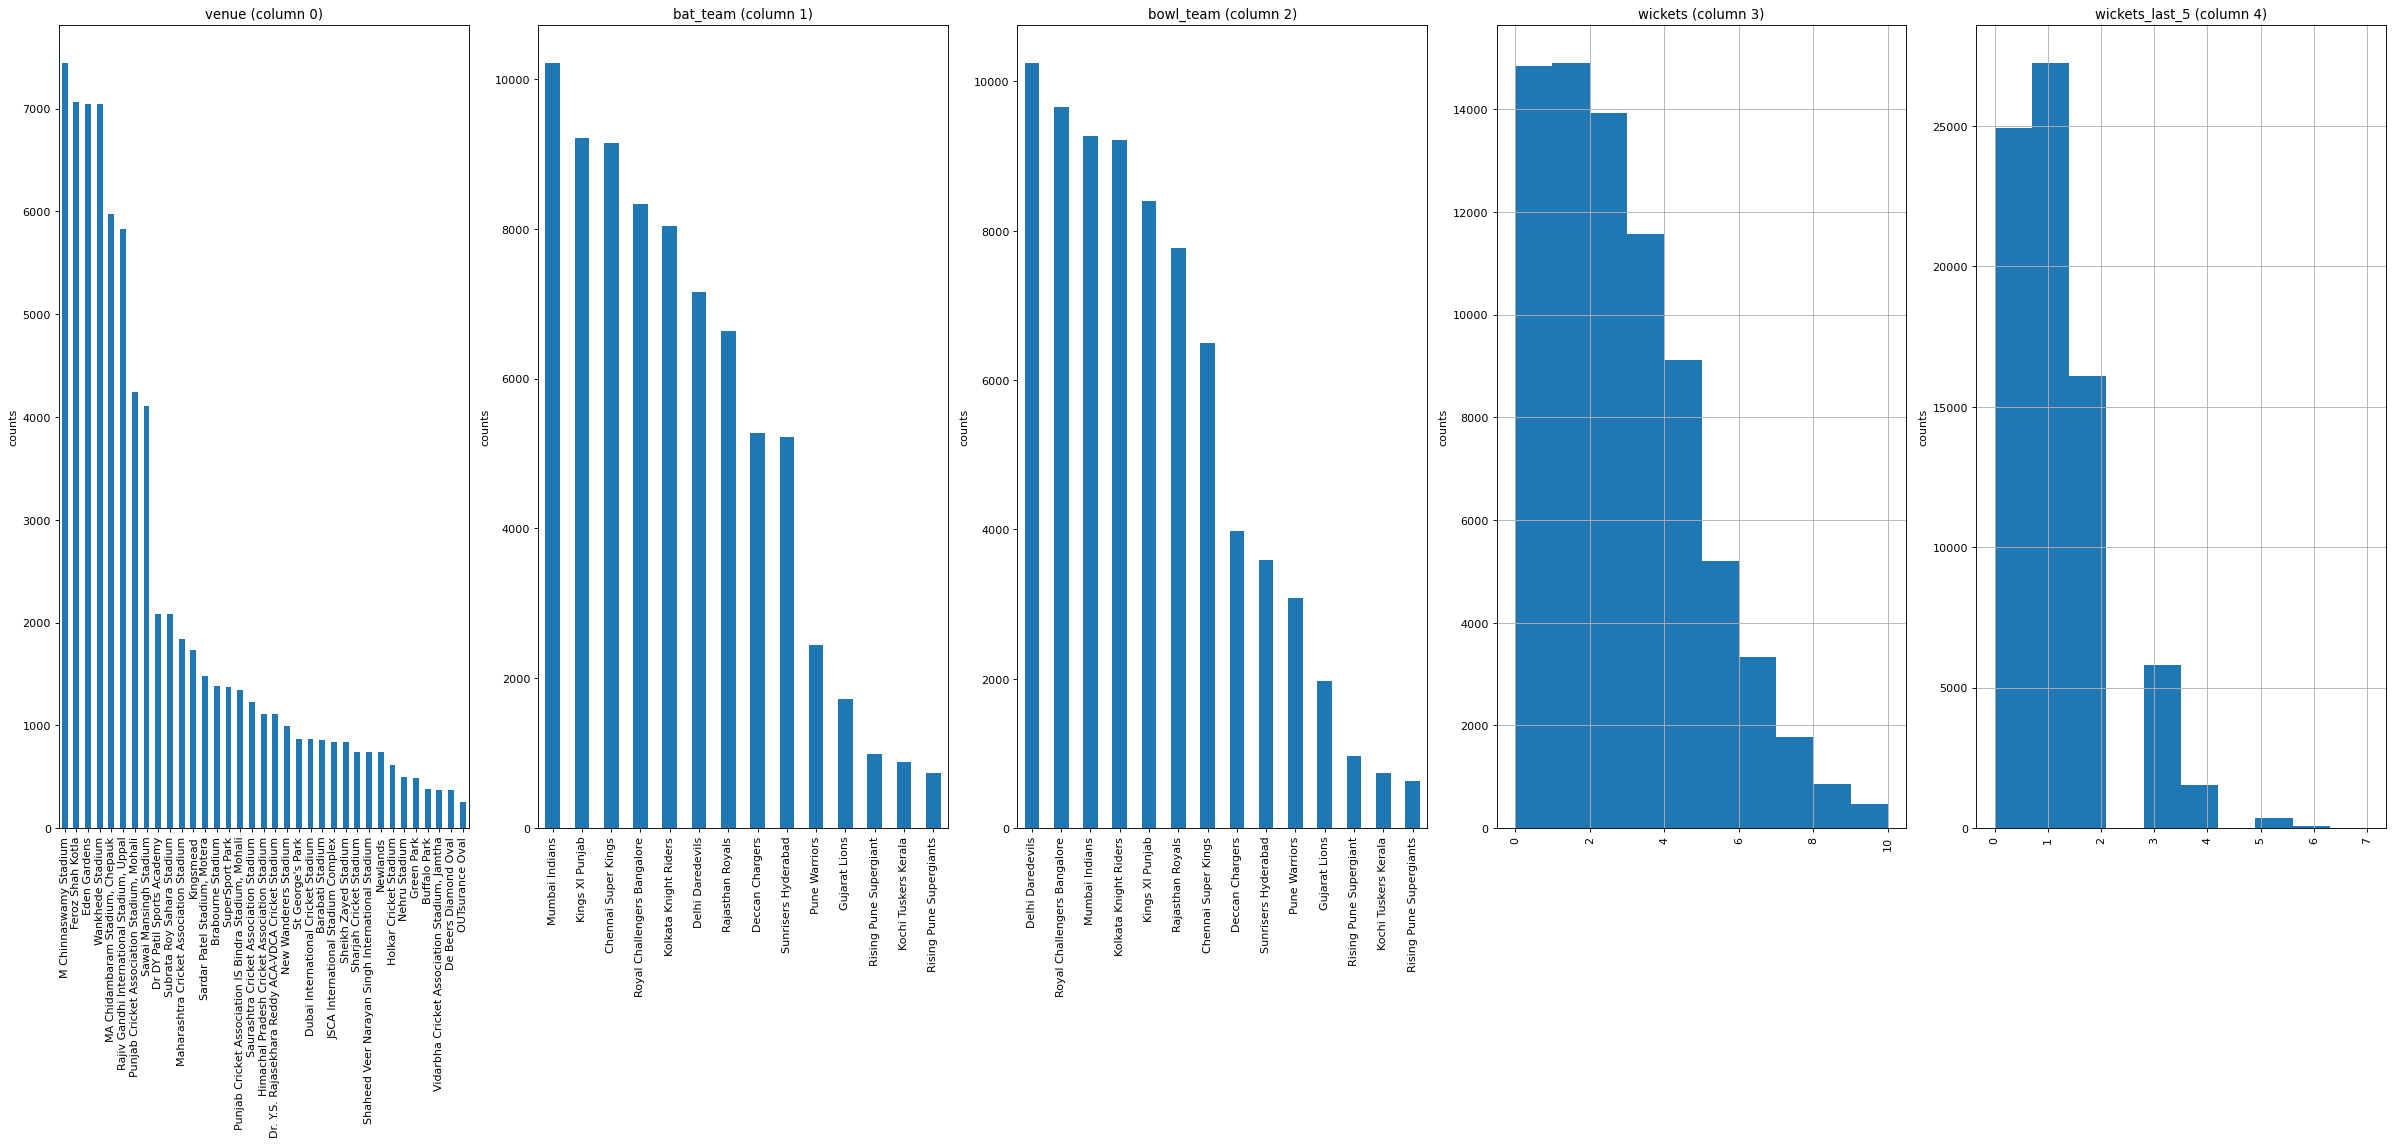

In [47]:
plotPerColumnDistribution(df, 10, 5)

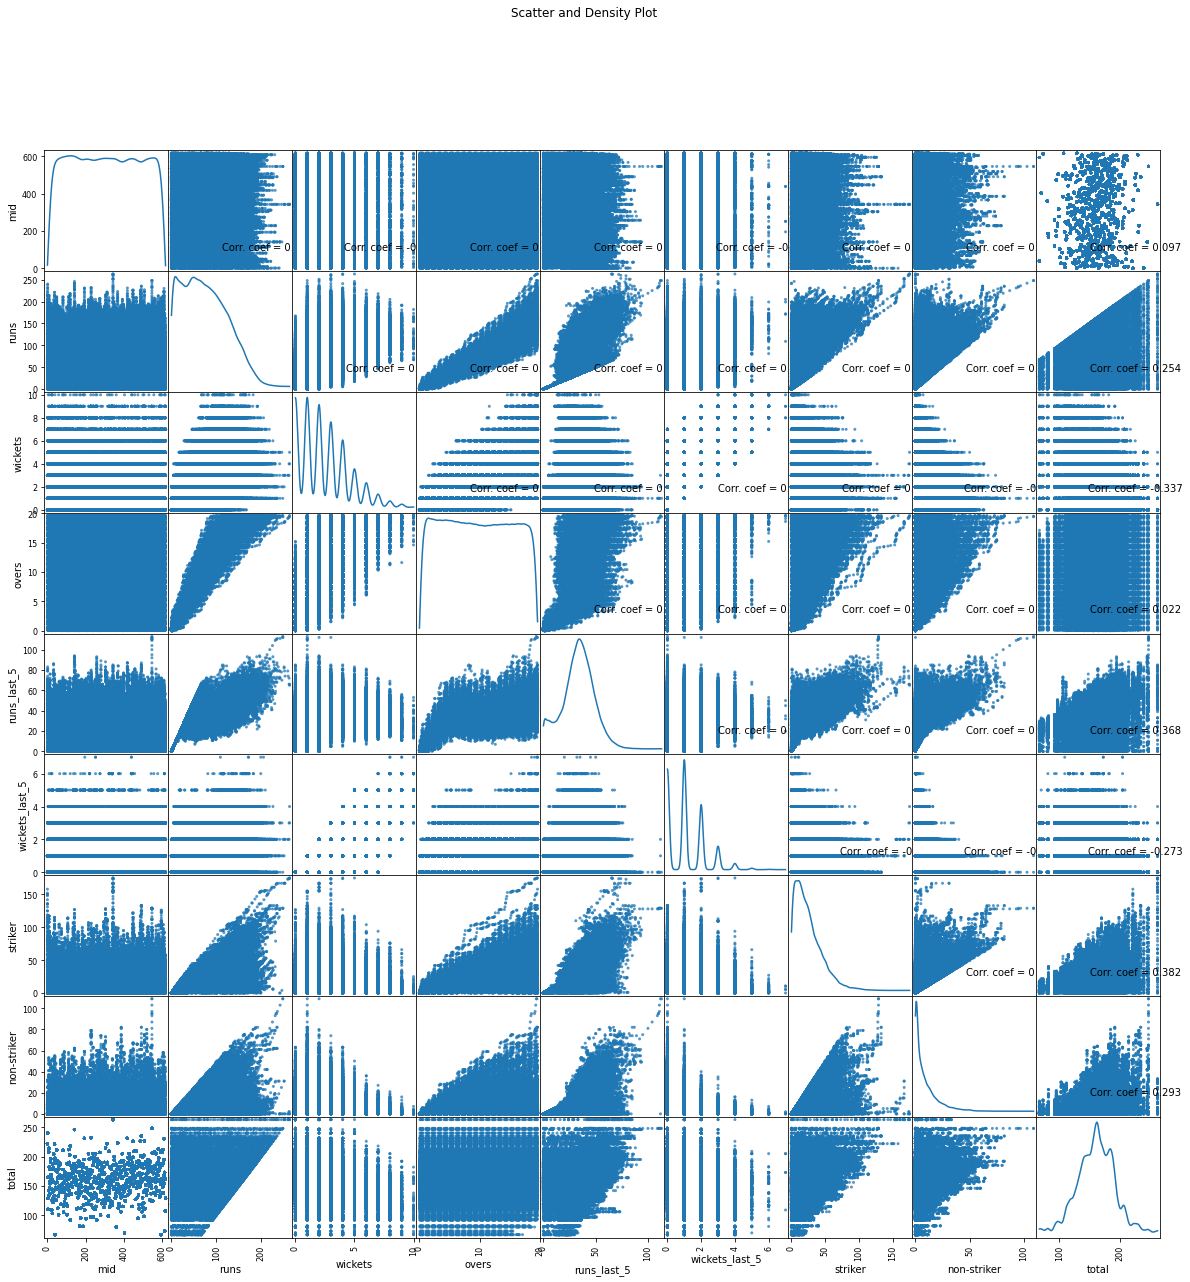

In [49]:
plotScatterMatrix(df, 20, 10)